In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To open a file, use the .open() command. Put the filename inside. Since the file is in the same directory as
# the code, you don't need additional addresses.
file = up.open("DataR_CH0@V2740B_22575_Board10_5V_100Hz_9usrisetime.root")

In [3]:
# This shows what the contents of the file are. Both of them are TTrees, classic data structure in ROOT.
file.classnames()

{'Data_R;17': 'TTree', 'Data_R;16': 'TTree'}

In [4]:
file["Data_R;16"]["Energy"]

<TBranch 'Energy' at 0x0001269d3d60>

In [6]:
tree = file["Data_R;16"]
tree.keys()
# .keys() shows the contents of the TBranch (get it? branches of the TTree haha)

['Channel', 'Timestamp', 'Board', 'Energy', 'Flags', 'Probe', 'Samples']

In [7]:
branch = tree["Energy"]
data = branch.arrays()
print(data)
# The data structure is like this: A big list consisting of individual dictionaries where 
# each data point is a dictionary and the value is the data point

[{Energy: 1416}, {Energy: 1414}, {...}, ..., {Energy: 1416}, {Energy: 1414}]


In [349]:
# Unpacking the weird data structure
energy = []
for val in data:
    energy.append(val["Energy"])

print(energy)
energy = np.array(energy)

[1416, 1414, 1418, 1414, 1422, 1401, 1415, 1412, 1413, 1411, 1414, 1414, 1414, 1418, 1414, 1416, 1419, 1406, 1411, 1414, 1409, 1419, 1414, 1412, 1407, 1416, 1409, 1410, 1416, 1408, 1408, 1405, 1417, 1411, 1418, 1414, 1414, 1411, 1411, 1417, 1416, 1411, 1420, 1408, 1414, 1416, 1416, 1411, 1415, 1410, 1412, 1408, 1413, 1412, 1407, 1414, 1414, 1421, 1416, 1405, 1421, 1409, 1418, 1412, 1413, 1413, 1414, 1421, 1414, 1408, 1416, 1407, 1411, 1412, 1412, 1410, 1409, 1413, 1411, 1416, 1417, 1417, 1420, 1411, 1408, 1405, 1416, 1411, 1410, 1416, 1411, 1414, 1413, 1415, 1415, 1409, 1417, 1416, 1422, 1425, 1411, 1413, 1413, 1420, 1416, 1413, 1411, 1405, 1413, 1414, 1410, 1409, 1410, 1410, 1415, 1417, 1417, 1411, 1417, 1412, 1419, 1420, 1421, 1410, 1411, 1414, 1416, 1409, 1414, 1413, 1408, 1420, 1416, 1412, 1412, 1402, 1415, 1410, 1402, 1411, 1413, 1411, 1409, 1410, 1413, 1413, 1411, 1411, 1423, 1405, 1406, 1414, 1418, 1415, 1419, 1412, 1407, 1410, 1421, 1415, 1415, 1413, 1413, 1415, 1412, 1424, 141

Text(0, 0.5, 'Counts')

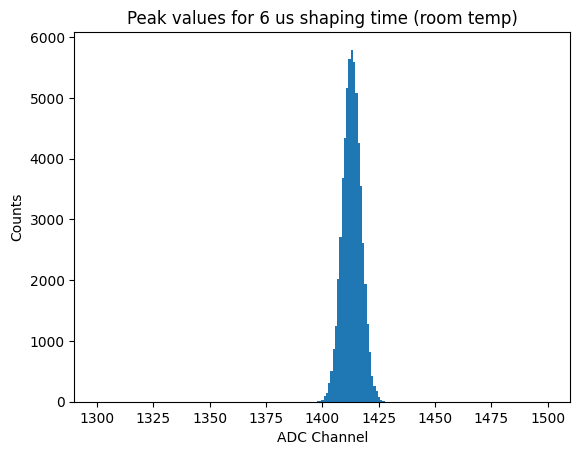

In [350]:
num_bin = 200
bin = np.linspace(1300, 1500, num_bin)
n, bins, patches = plt.hist(energy, bins=bin)
plt.title("Peak values for 6 us shaping time (room temp)")
plt.xlabel("ADC Channel")
plt.ylabel("Counts")

In [351]:
from scipy.optimize import curve_fit
def Gauss(x, A, mean, std):
  gauss = A*np.exp(-(x-mean)**2/(2*std**2))
  return gauss

In [352]:
popt, pcov = curve_fit(Gauss, bin[0:199], n, p0=[6000, 1415, 25])
print(popt)

[5.77625093e+03 1.41250423e+03 4.07048428e+00]


4.070484276825656


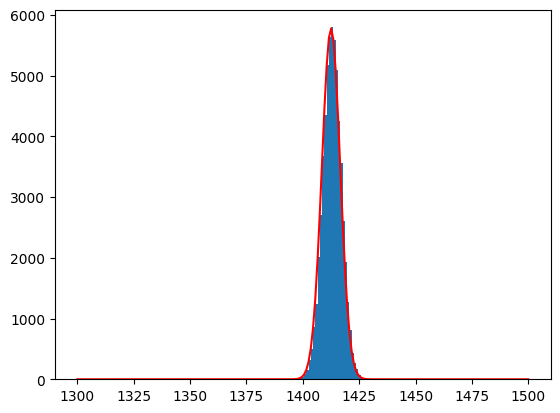

In [353]:
plt.plot(bin, Gauss(bin, *popt), color="red")
n2, b2, p2 = plt.hist(energy, bins=bin)
print(popt[2])

In [354]:
# ADC Channel to energy conversion
# Each ADC is 30 uV b/c Peak-Peak max for CAEN is 2 V and there's 2^16 bits -> 2 V/65536 = 30.5 uV
# From V -> eV: peak V = 1.875 MeV
# Update: can go directly from peak ADC to energy units by equating the peak energy to 1.875 MeV
# Make sure to fit the curve to the ADC data first to use the curve fitted mean as the peak value
peak = popt[1]
#volts_conv_factor = 1.875e3/peak # volts to keV
#in_volts = energy * 30e-6
#in_eV = in_volts * volts_con_factor
one_ADC = 1.875e3/peak
in_keV = energy*one_ADC
stdev_keV = popt[2] * one_ADC
print(stdev_keV)

5.403281518532211


[28.17961944 22.15224124 19.48503446 16.95924904 16.19840214 15.68362841
 15.45735424 15.28199176]


Text(0, 0.5, 'FWHM (keV)')

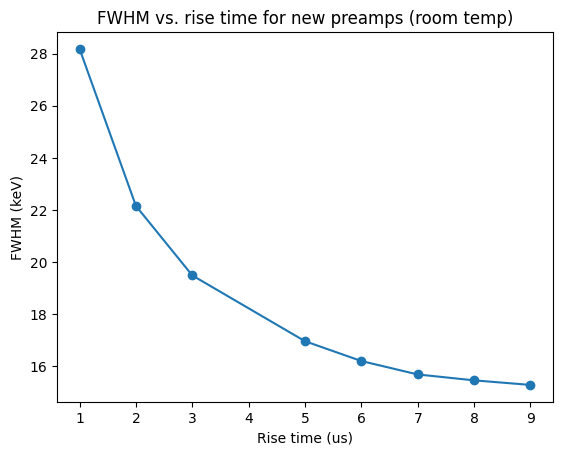

In [357]:
# Going from stdev to FWHM is FWHM = 2*sqrt(2)*stdev
stdev_array = np.array([9.963, 7.832, 6.889, 5.996, 5.727, 5.545, 5.465, 5.403])
rise_time = np.array([1, 2, 3, 5, 6, 7, 8, 9])
FWHM_array = stdev_array*2*np.sqrt(2)
print(FWHM_array)
plt.scatter(rise_time, FWHM_array)
plt.plot(rise_time, FWHM_array)
plt.title("FWHM vs. rise time for new preamps (room temp)")
plt.xlabel("Rise time (us)")
plt.ylabel("FWHM (keV)")